CUSTOMER SEGMENTATION

--------IMPORTING LIBRARIES----------

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

READING DATA FROM THE FILE

In [103]:
rtl_data = pd.read_csv("C:\\Users\\shriy\\JUPITER\\ML PROJECT\\Online Retail.csv")


In [104]:
rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [105]:
rtl_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [106]:
rtl_data.shape

(541909, 8)

In [107]:
rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [108]:
rtl_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [109]:
country_cust_data = rtl_data[['Country','CustomerID']].drop_duplicates()

In [110]:
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending = False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [111]:
rtl_data = rtl_data.query('Country=="United Kingdom"').reset_index(drop=True)
rtl_data.isnull().sum(axis=0)
rtl_data = rtl_data[pd.notnull(rtl_data['CustomerID'])]
rtl_data.Quantity.min()
rtl_data.UnitPrice.min()

np.float64(0.0)

In [112]:
rtl_data = rtl_data[(rtl_data['Quantity']>0)]
rtl_data['InvoiceDate']=pd.to_datetime(rtl_data['InvoiceDate'])
rtl_data['TotalAmount']=rtl_data['Quantity']*rtl_data['UnitPrice']

DATA_SET IS CLEANED AND NOW WE CAN PROCESSED FURTHER

In [113]:
import datetime as dt

latest_date = dt.datetime(2011, 12, 10)
RFMscores = rtl_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': lambda x: len(x),
    'TotalAmount': lambda x: x.sum()
})
RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)
RFMscores.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

print(RFMscores)

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12747.0           2        103   4196.01
12748.0           0       4596  33719.73
12749.0           3        199   4090.88
12820.0           3         59    942.34
...             ...        ...       ...
18280.0         277         10    180.60
18281.0         180          7     80.82
18282.0           7         12    178.05
18283.0           3        756   2094.88
18287.0          42         70   1837.28

[3921 rows x 3 columns]


In [114]:
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [115]:
RFMscores.reset_index().tail()

,CustomerID,Recency,Frequency,Monetary
3916,18280.0,277,10,180.60
3917,18281.0,180,7,80.82
3918,18282.0,7,12,178.05
3919,18283.0,3,756,2094.88
3920,18287.0,42,70,1837.28


In [116]:
RFMscores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

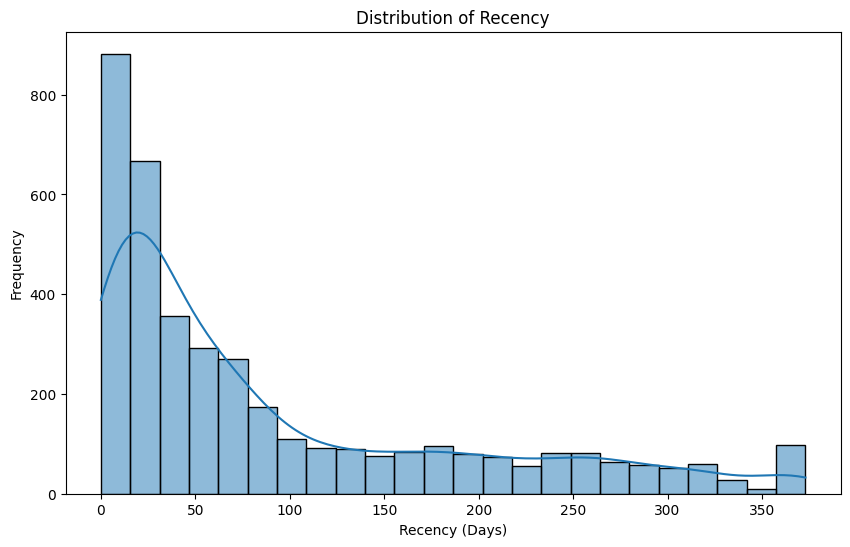

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64


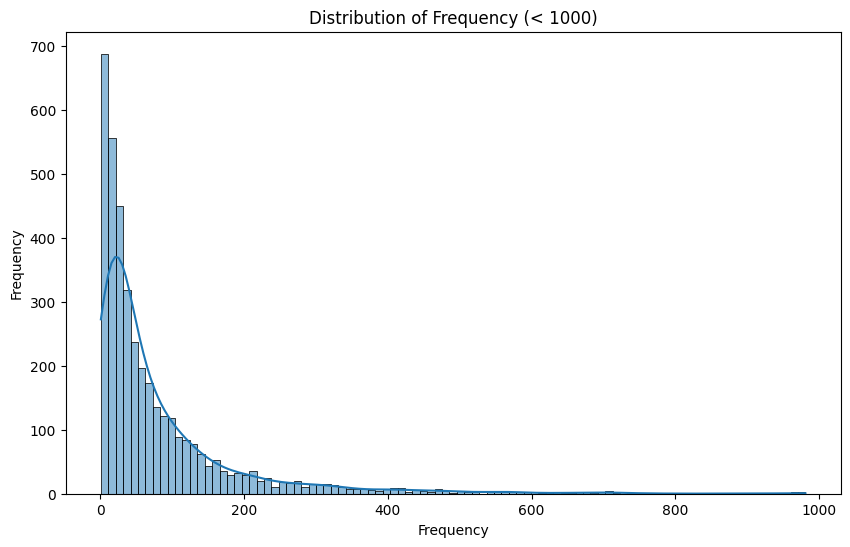

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64


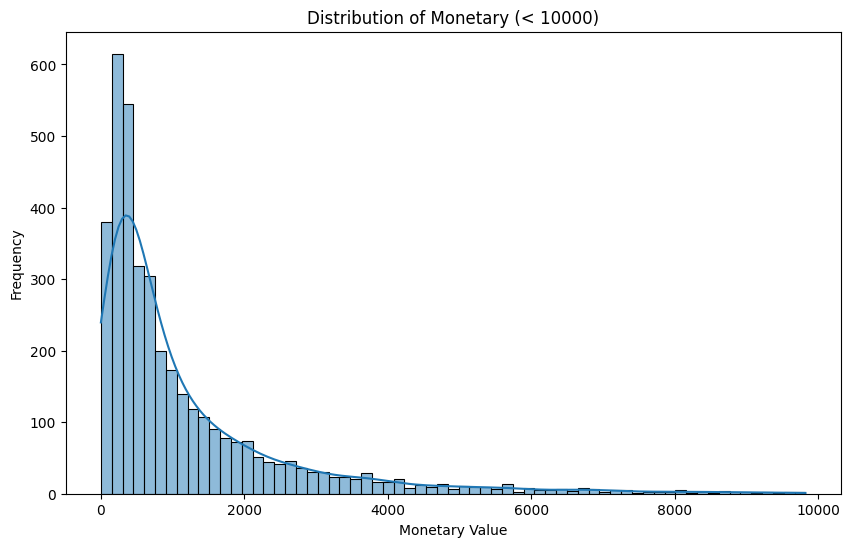

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}, 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0}, 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

x = RFMscores['Recency']
plt.figure(figsize=(10, 6))
sns.histplot(x, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()

frequency_desc = RFMscores['Frequency'].describe()
print(frequency_desc)

x = RFMscores.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10, 6))
sns.histplot(x, kde=True)
plt.title('Distribution of Frequency (< 1000)')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

monetary_desc = RFMscores['Monetary'].describe()
print(monetary_desc)

x = RFMscores.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10, 6))
sns.histplot(x, kde=True)
plt.title('Distribution of Monetary (< 10000)')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()

quantiles = RFMscores.quantile(q=[0.25, 0.5, 0.75]).to_dict()
print(quantiles)

In [118]:
def RScoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [119]:
def FnMScoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [120]:
RFMscores['R']=RFMscores['Recency'].apply(RScoring , args=('Recency',quantiles,))
RFMscores['F']=RFMscores['Frequency'].apply(FnMScoring,args=('Frequency',quantiles,))
RFMscores['M']=RFMscores['Monetary'].apply(FnMScoring,args=('Monetary',quantiles,))
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [121]:
RFMscores['RFMGroup']=RFMscores.R.map(str)+RFMscores.F.map(str)+RFMscores.M.map(str)
31
RFMscores['RFMscore']=RFMscores[['R','F','M']].sum(axis=1)
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMscore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


ADDING TWO ATTRIBUTES NAMING LOYALTY_LEVEL AND RFM

In [122]:
Loyalty_level = ['Platinum','Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMscores.RFMscore,q=4,labels=Loyalty_level)
RFMscores['RFM_Loyalty_Level'] = Score_cuts.values
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMscore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [123]:
RFMscores[RFMscores['RFMGroup']=='111'].sort_values('Monetary',ascending=False).reset_index().head(
10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMscore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum


In [124]:
RFMscores[RFMscores['RFMGroup']=='111'].sort_values('Monetary',ascending=False).reset_index().head(
10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMscore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
graph = RFMscores.query('Monetary < 50000 and Frequency < 2000')
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Prepare plot data for different loyalty levels

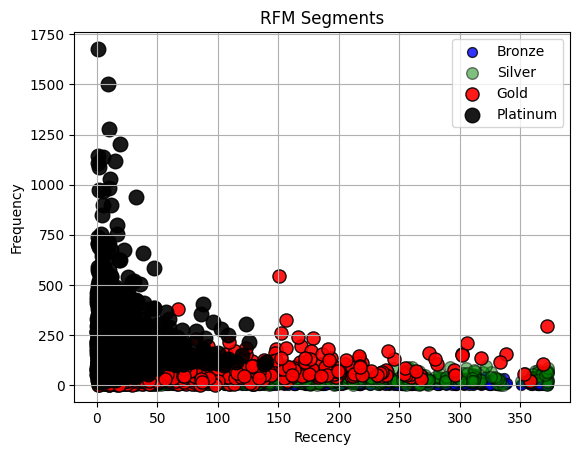

In [127]:
plt.scatter(
    graph.query('RFM_Loyalty_Level == "Bronze"')['Recency'],
    graph.query('RFM_Loyalty_Level == "Bronze"')['Frequency'],
    color='blue', s=50, label='Bronze', alpha=0.8, edgecolors='black'
)

# Plot for Silver
plt.scatter(
    graph.query('RFM_Loyalty_Level == "Silver"')['Recency'],
    graph.query('RFM_Loyalty_Level == "Silver"')['Frequency'],
    color='green', s=70, label='Silver', alpha=0.5, edgecolors='black'
)

# Plot for Gold
plt.scatter(
    graph.query('RFM_Loyalty_Level == "Gold"')['Recency'],
    graph.query('RFM_Loyalty_Level == "Gold"')['Frequency'],
    color='red', s=90, label='Gold', alpha=0.9, edgecolors='black'
)

# Plot for Platinum
plt.scatter(
    graph.query('RFM_Loyalty_Level == "Platinum"')['Recency'],
    graph.query('RFM_Loyalty_Level == "Platinum"')['Frequency'],
    color='black', s=110, label='Platinum', alpha=0.9, edgecolors='black'
)

# Add labels and title
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title('RFM Segments')
plt.legend()
plt.grid(True)
plt.show()

Function to handle negative and zero values

In [128]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [129]:
RFMscores['Recency'] = [handle_neg_n_zero(x) 
                        for x in RFMscores['Recency']]
RFMscores['Monetary'] = [handle_neg_n_zero(x) 
                         for x in RFMscores['Monetary']]

In [130]:
Log_Tfd_Data = RFMscores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

PLOT RECENCY DISTRIBUTION USING SEABORN

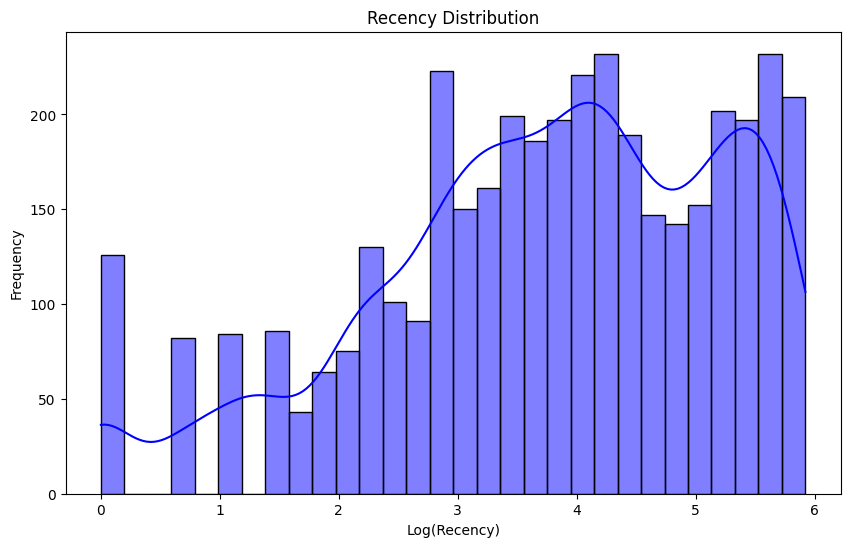

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(Log_Tfd_Data['Recency'], kde=True, color='blue', bins=30)
plt.title('Recency Distribution')
plt.xlabel('Log(Recency)')
plt.ylabel('Frequency')
plt.show()

PLOT FREQUENCY DISTRIBUTION (ONLY FREQUENCY < 1000) USING SEABORN

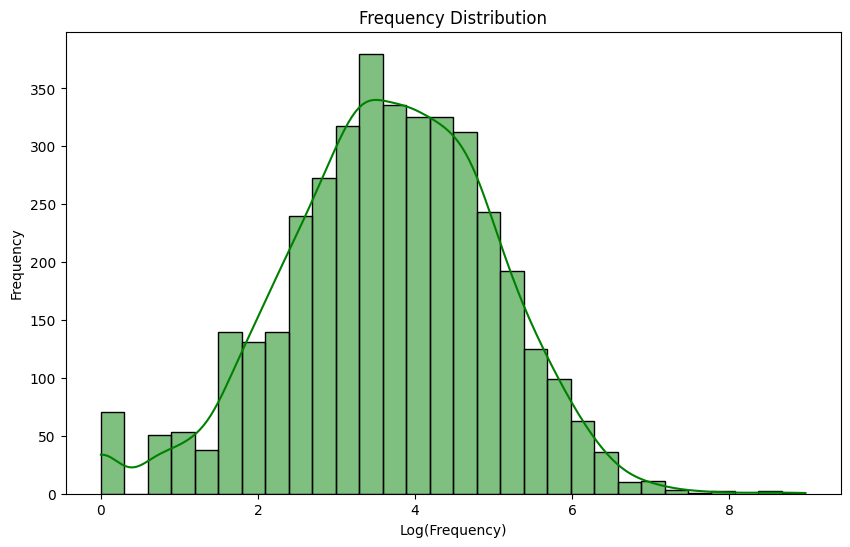

In [132]:
plt.figure(figsize=(10, 6))
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
sns.histplot(Frequency_Plot, kde=True, color='green', bins=30)
plt.title('Frequency Distribution')
plt.xlabel('Log(Frequency)')
plt.ylabel('Frequency')
plt.show()

PLOT MONETARY DISTRIBUTION (ONLY MONETARY < 10000) USING SEABORN

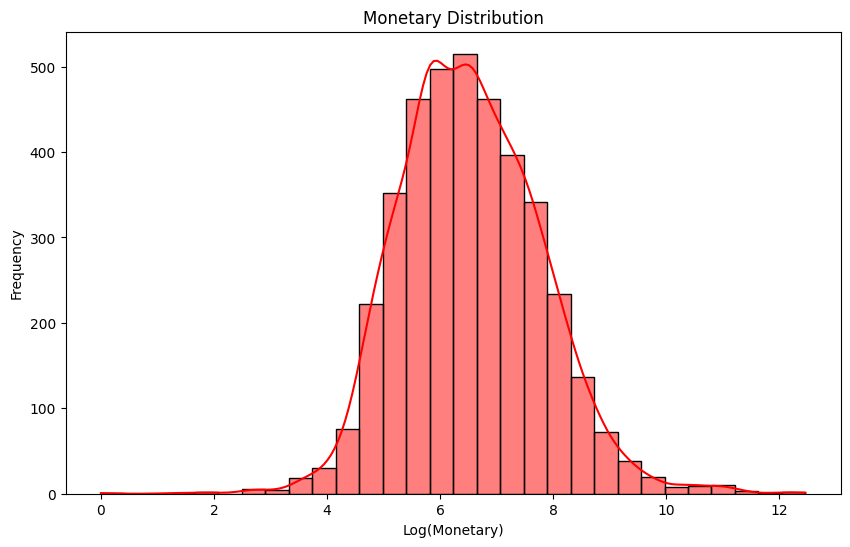

In [133]:
plt.figure(figsize=(10, 6))
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
sns.histplot(Monetary_Plot, kde=True, color='red', bins=30)
plt.title('Monetary Distribution')
plt.xlabel('Log(Monetary)')
plt.ylabel('Frequency')
plt.show()

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
# Convert the scaled numpy array back to DataFrame with the same index and column names
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)
Scaled_Data = pd.DataFrame(Scaled_Data,index=RFMscores.index,columns=Log_Tfd_Data.columns)

In [136]:
from sklearn.cluster import KMeans

Elbow Method to find the optimal number of clusters (k)

In [137]:
sum_of_sq_dist = {}
for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_

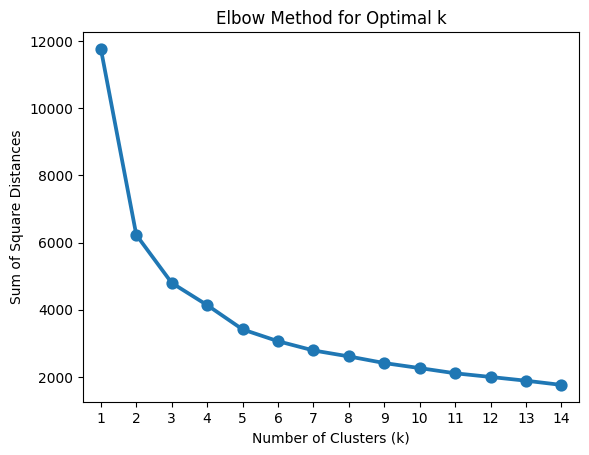

In [138]:
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

APPLYING K-MEANS CLUSTERING AND ASSIGNING THE CLUSTER LABELS TO THE ORIGINAL DATAFRAME

In [139]:
KMean_clust = KMeans(n_clusters=3, init='k-means++', max_iter=1000)
KMean_clust.fit(Scaled_Data)

RFMscores['Cluster'] = KMean_clust.labels_

print(RFMscores.head())

            Recency  Frequency  Monetary  R  F  M RFMGroup  RFMscore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12747.0           2        103   4196.01  1  1  1      111         3   
12748.0           1       4596  33719.73  1  1  1      111         3   
12749.0           3        199   4090.88  1  1  1      111         3   
12820.0           3         59    942.34  1  2  2      122         5   

           RFM_Loyalty_Level  Cluster  
CustomerID                             
12346.0               Silver        0  
12747.0             Platinum        1  
12748.0             Platinum        1  
12749.0             Platinum        1  
12820.0             Platinum        1  


VISUALIZING THE CLUSTERS USING A SCATTER PLOT AND SETTING THE PLOT TITLE AND AXIS LABELS

<Figure size 1000x800 with 0 Axes>

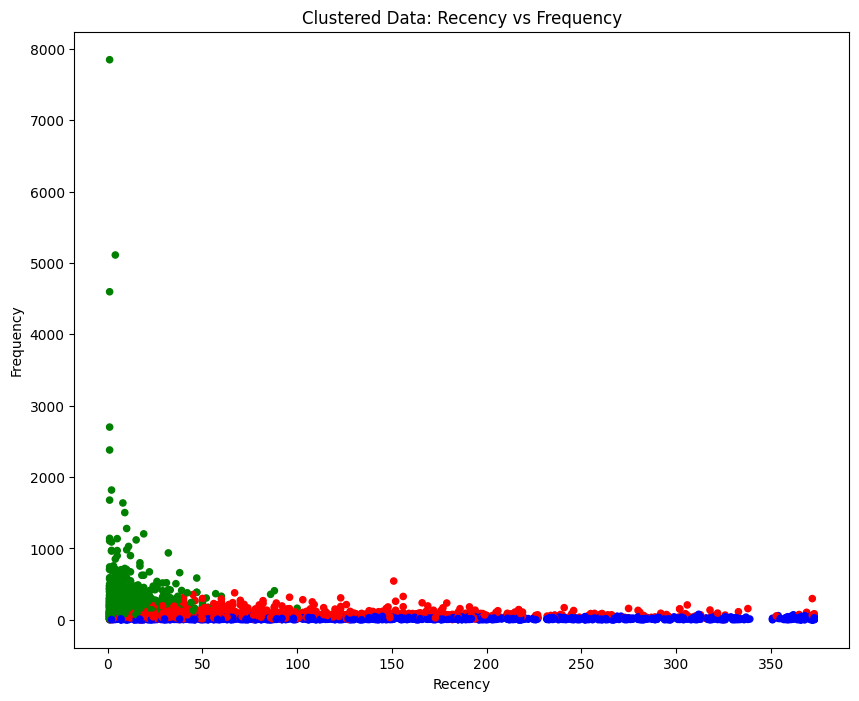

In [140]:
plt.figure(figsize=(10, 8))
Colors = ['red', 'green', 'blue']  # Different colors for each cluster
RFMscores['Color'] = RFMscores['Cluster'].map(lambda p: Colors[p])
ax = RFMscores.plot(kind='scatter', x='Recency', y='Frequency', figsize=(10, 8), c=RFMscores['Color'])
plt.title('Clustered Data: Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

MARKET BASKET ANALYSIS

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import seaborn as sns

In [142]:
data = pd.read_csv('Online Retail.csv')

In [145]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [216]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


DATA PREPROCESSING

In [217]:
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

In [235]:
myretaildata.drop_duplicates(subset=['InvoiceNo', 'Description'], inplace=True)

In [236]:
print("Country Distribution:")
print(data['Country'].value_counts())

Country Distribution:
Country
United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA      

In [243]:
data.shape

(532621, 8)

In [244]:
mybasket = (myretaildata[myretaildata['Country'] == "Germany"]
            .groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))

VIEW THE FIRST FEW BASKET RECORDS FOR GERMANY

In [245]:
mybasket.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
mybasket.tail()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
C580313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C580714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C580740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C580989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ENCODING FUNCTION TO CONVERT QUANTITIES TO BINARY (1 OR 0)

In [247]:
def my_encode_units(x):
    if x <= 0:
        return 0 
    if x >= 1:
        return 1 

In [248]:
#APPLY THE ENCODING FUNCTION TO ALL QUANTITIES IN THE BASKET DATA USING MAP
my_basket_sets = mybasket.apply(lambda x: x.apply(my_encode_units), axis=1)

# Drop 'POSTAGE' column (if present)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1)

# Prepare data for apriori (list of transactions)
transactions = []
for invoice in my_basket_sets.index:
    transaction = my_basket_sets.loc[invoice]
    transactions.append(transaction[transaction == 1].index.tolist())




APPLY APRIORI FROM THE APYORI PACKAGE

In [250]:
rules = apriori(transactions, min_support=0.07, min_confidence=0.3, min_lift=3, min_length=2)

results = list(rules)
rule_list = []
for rule in results:
    for ordered_stat in rule.ordered_statistics:
        rule_list.append({
            'antecedents': list(ordered_stat.items_base),
            'consequents': list(ordered_stat.items_add),
            'support': rule.support,
            'confidence': ordered_stat.confidence,
            'lift': ordered_stat.lift
        })

rules_df = pd.DataFrame(rule_list)

# Display top rules
rules_df.head()

,antecedents,consequents,support,confidence,lift
0,[ROUND SNACK BOXES SET OF 4 FRUITS ],[ROUND SNACK BOXES SET OF4 WOODLAND ],0.099502,0.833333,4.486607
1,[ROUND SNACK BOXES SET OF4 WOODLAND ],[ROUND SNACK BOXES SET OF 4 FRUITS ],0.099502,0.535714,4.486607


Plotting the lift vs confidence

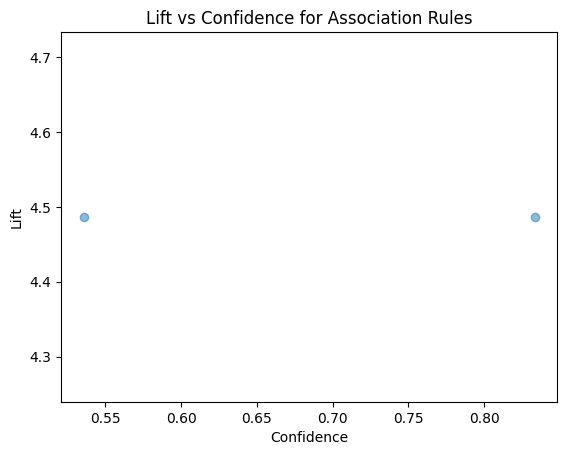

In [251]:
plt.scatter(rules_df['confidence'], rules_df['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs Confidence for Association Rules')
plt.show()